# Lecture 3 - Basic Data Processing with NumPy and Matplotlib

## Overview, Objectives, and Key Terms
 
In this lesson, we'll explore some core features of NumPy and Matplotlib and extend our Python based "calculator" to include processing of *arrays* of data.  [NumPy](http://www.numpy.org/) is the basic numerical package for Python.  A lot of its utility comes from its numerical, multidimensional array type, `ndarray`. Use of these arrays in a *vectorized* way often leads to significantly faster (and much more compact) code.  Moreover, the array-valued results of numerical computations are  easily visualized using Matplotlib, which was originally developed to provide MATLAB-like graphics in the Python environment.   

I think it's so important that students can create, process, and display data that I highlight it early in the course and revisit it throughtout.  NumPy and Matplotlib together provide about the easiest way to work with data.

### Objectives

By the end of this lesson, you should be able to

- *define and manipulate one-dimensional NumPy arrays*
- *produce plots of data following best practices*
- *load data from text files*
- *save data to text files*

### Key Terms

- `numpy`
- `ndarray` 
- `np.array`
- `np.ones`
- `np.zeros`
- `np.linspace`
- `np.sin`
- `np.mean` (or `v.mean` where `v` is of type `ndarray`)
- `max` (or `np.max` or `v.max`)
- `sum` (or `np.sum` or `v.sum`) 
- `matplotlib.pyplot`
- `np.loadtxt`
- `np.savetxt`
- `v.T`, where `v` is a two-dimensional `ndarray`
- `str` formats

In [1]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

## NumPy and One-Dimensional Arrays

In [2]:
import numpy

In [3]:
import numpy as np # very common

In [4]:
numpy.sin(1.0)
np.sin(1.0)

0.8414709848078965

0.8414709848078965

### A Motivating Example

Common task: evaluate a mathematical function `f(x)` at *discrete points*.  


Specific case: evaluate $f(x) = \sin(x)$ at $x \in [0, 1]$ using 10 evenly-spaced points.  

Easy using the function `np.linspace` as follows:

In [5]:
x = np.linspace(0, 1, 10)
x # remember, a variable all by itself as input prints its value as output

array([ 0.        ,  0.11111111,  0.22222222,  0.33333333,  0.44444444,
        0.55555556,  0.66666667,  0.77777778,  0.88888889,  1.        ])

In [6]:
y = np.sin(x)
y

array([ 0.        ,  0.11088263,  0.22039774,  0.3271947 ,  0.42995636,
        0.52741539,  0.6183698 ,  0.70169788,  0.77637192,  0.84147098])

Why not `math.sin(x)`?

### Creating and Manipulating 1-D Arrays


| function      | example use                     | what it creates creates     | 
|---------------|---------------------------------|-----------------------------|
| `np.array(sequence)`    | `np.array([1.5, 2.7, 3.1])`     | `array([ 1.5,  2.7,  3.1])` |
| `np.linspace(start, stop, num)` | `np.linspace(0, 1, 3)`          | `array([ 0. ,  0.5,  1. ])` |
| `np.ones(shape)`     | `np.ones(3)`                    | `array([ 1.,  1.,  1.])`    |
| `np.zeros(shape)`    | `np.zeros(3)`                   | `array([ 0.,  0.,  0.])`    |
| `np.arange(start, end, step)`   | `np.arange(1, 7, 2)`               | ` array([1, 3, 5])`         |

**Examples...**

NumPy arrays support **vectorized** operations:

In [7]:
a = np.array([1, 2, 3])
b = np.array([2, 3, 4])
c = a*b
c

array([ 2,  6, 12])

In [8]:
d = 2*a
d

array([2, 4, 6])

### Inspecting Arrays and Their Elements

Access elements of an array (called *indexing*) using `[]`:

In [9]:
d[0]

2

> **Warning**: Numbering starts with zero in Python

In [10]:
d[len(d)-1]

6

In [11]:
d[-1]

6

> **Note**:  Access the $i$th to last element of `array` via `array[-(1+i)]`.

We can change values, too:

In [12]:
d[0] = 99
d

array([99,  4,  6])

We can also determine an array's length (or, more generically, size):

In [13]:
len(d)
d.size
d.shape

3

3

(3,)

What else do `ndarray` variables have?

## Diving into `pyplot`

We have an array `x` and the array `y = np.sin(x)`.  How to plot?

In [14]:
import matplotlib.pyplot as plt

> **Note**: Just like NumPy is often shorted to `np`, `matplotlib.pyplot` is often used as `plt`.  

### The Simplest Plot

In [15]:
plt.plot(x, y) # x and y were defined above

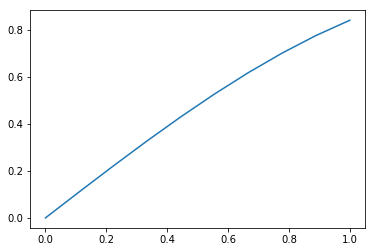

In [16]:
plt.show()

### Multiple Curves and Best Practices

What about multiple curves?  Let's define a second curved equal to `np.cos` evaluated at `x`:

In [17]:
z = np.cos(x)

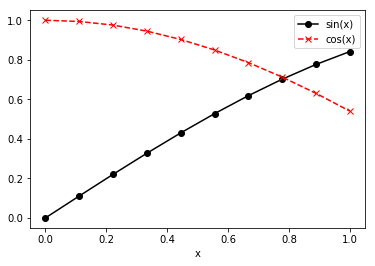

In [18]:
plt.plot(x, y, 'k-o', x, z, 'r--x')
plt.legend(['sin(x)', 'cos(x)'], loc=0)
plt.xlabel('x')
plt.show()

> **Note**: All plots should include appropriate axis labels and legends.

### Basic Matplotlib Colors

| symbol      | color     | 
|-------------|-----------|
| `k`         | black     |
| `b`         | blue      |
| `r`         | red       |
| `g`         | green     |
| `c`         | cyan      |
| `m`         | magenta   |

### Basic Matplotlib Line Styles

| symbol      | style     | 
|-------------|-----------|
| `-`         | solid     |
| `--`        | dash-dash |
| `-.`        | dash-dot  |
| `:`         | dot-dot   |

### Basic Matplotlib Markers

| symbol      | marker    | 
|-------------|-----------|
| `o`         | circle    |
| `x`         | x         |
| `^`         | triangle pointed up  |
| `>`         | triangle pointed right  |
| `s`         | square  |
| `h`         | hexagon  |


## Data Input and Output via NumPy


```
time (s)   vel (m/s)  acc (m/s**2)
0.00000000 1.00000000 0.00000000
0.22222222 1.24884887 0.01097394
0.44444444 1.55962350 0.08779150
0.66666667 1.94773404 0.29629630
0.88888889 2.43242545 0.70233196
1.11111111 3.03773178 1.37174211
1.33333333 3.79366789 2.37037037
1.55555556 4.73771786 3.76406036
1.77777778 5.91669359 5.61865569
2.00000000 7.38905610 8.00000000
```

In [19]:
data = np.loadtxt('data.txt', skiprows=1)
data

array([[ 0.        ,  1.        ,  0.        ],
       [ 0.22222222,  1.24884887,  0.01097394],
       [ 0.44444444,  1.5596235 ,  0.0877915 ],
       [ 0.66666667,  1.94773404,  0.2962963 ],
       [ 0.88888889,  2.43242545,  0.70233196],
       [ 1.11111111,  3.03773178,  1.37174211],
       [ 1.33333333,  3.79366789,  2.37037037],
       [ 1.55555556,  4.73771786,  3.76406036],
       [ 1.77777778,  5.91669359,  5.61865569],
       [ 2.        ,  7.3890561 ,  8.        ]])

In [20]:
data.shape

(10, 3)

What if we want `t`, `v`, and `a` separately?

In [21]:
t, v, a = np.loadtxt('data.txt', skiprows=1, unpack=True)
t

array([ 0.        ,  0.22222222,  0.44444444,  0.66666667,  0.88888889,
        1.11111111,  1.33333333,  1.55555556,  1.77777778,  2.        ])

> **Note**: If data is numerical and stored in a simple, collimated format, use `np.loadtxt`

What about saving data to text files?  The simplest way:

In [22]:
np.savetxt("some_data.txt", data)

## Recap

You should now be able to

- *define and manipulate one-dimensional NumPy arrays*
- *produce plots of data following best practices*
- *load data from text files*
- *save data to text files*